In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **CONTENT :**

1. [Read Data](#1)
2. [Top 100 Video Games](#2)
3. [Genre VS Platform](#3)
4. [Genre and Region](#4)
5. [Word Cloud with Game Names](#5)
6. [3D Bubble Chart with Release Years, Global Sales and Publisher of Top 1000 Games](#6)

<a id="1"></a> <br>
> ## **1. Read Data**

In [2]:
# image = "../input/h-and-m-personalized-fashion-recommendations/images"
articles = "../input/h-and-m-personalized-fashion-recommendations/articles.csv"
customers = "../input/h-and-m-personalized-fashion-recommendations/customers.csv"
transactions = "../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv"

<a id="1"></a> <br>
> ## **2. Articles**

In [3]:
def create_df(url:str) -> pd.DataFrame:
    df = pd.read_csv(url)
    return df

def get_article_id(df:pd.DataFrame, ids:pd.Series) -> pd.DataFrame:
    df['article_id'] = ["0" + str(id) for id in ids]
    return df

In [4]:
articles = create_df(articles)
ids = articles['article_id']
articles = get_article_id(articles, ids)
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


<a id="2"></a> <br>
> ##  **2.1 What product do they have the most?**

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def val_cnt(df:pd.DataFrame, col:str, top_n:int):
    plt.figure(figsize = (8, 6))
    sns.set(style = 'whitegrid')
    _order = df[col].value_counts()[:top_n].index
    viz = sns.countplot(x = col, data = df,
                        order = _order)
    plt.xticks(rotation = 45)
    plt.show()

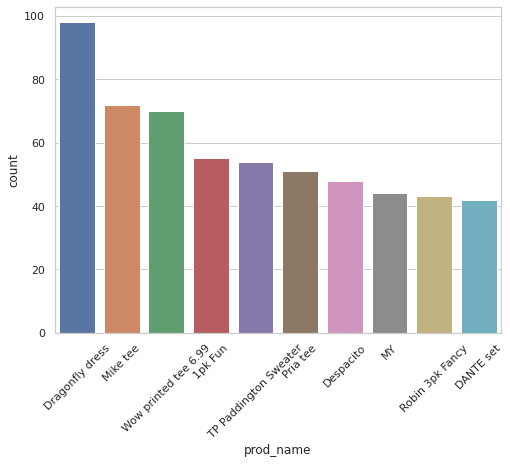

In [6]:
val_cnt(articles, 'prod_name', 10)

<a id="2"></a> <br>
> ##  **2.2 What type of index that is accounted for the most?**

In [7]:
def pie_chart(df:pd.DataFrame, col:str):
    _cnt_of_col = df[col].value_counts()
    _name_cnt = [tuple((x, y)) for x, y in _cnt_of_col.items()]
    _vals = [val[1] for val in _name_cnt]
    _label = [val[0] for val in _name_cnt]
    plt.pie(_vals, labels = _label,
            radius = 1.5, autopct = "%0.2f%%")
    plt.show()

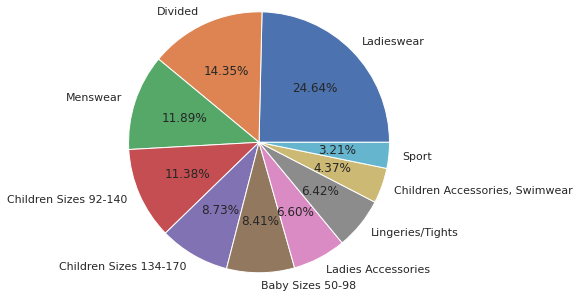

In [8]:
pie_chart(articles, 'index_name')

<a id="2"></a> <br>
> ##  **2.3 what's the portion of index group name for each garment group?**

In [9]:
def portion(df:pd.DataFrame, y:str, hue:str):
    _f, _ax = plt.subplots(figsize = (10, 10))
    _ax = sns.histplot(data=df, y=y, hue=hue, multiple="stack")
    plt.show()

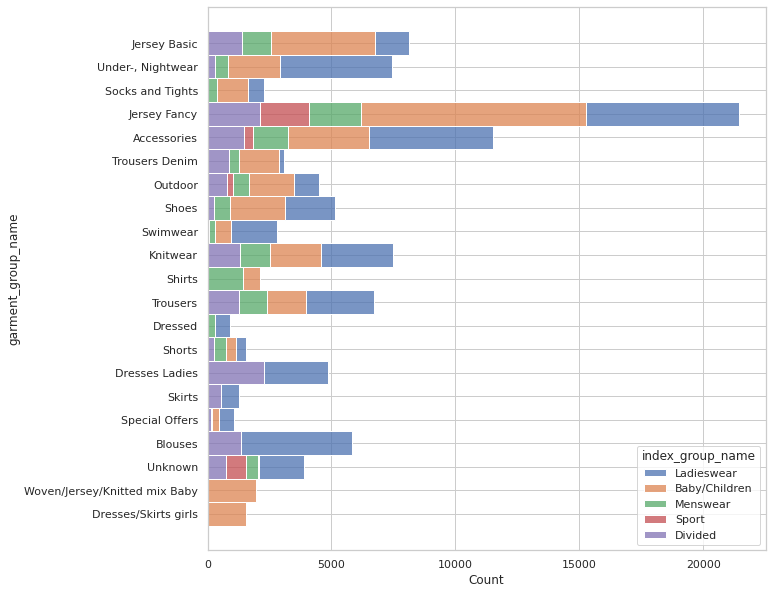

In [10]:
portion(articles, 'garment_group_name', 'index_group_name')

<a id="1"></a> <br>
> ## **3. Customers**

In [11]:
customers = create_df(customers)
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


<a id="2"></a> <br>
> ##  **3.1 How many Customers for each of club member status?**

In [12]:
def cust_ratio(df:pd.DataFrame, col:str, check_val:str) -> float: 
    _total = df.shape[0]
    _target = df[df[col] == check_val].shape[0]
    return round((_target/_total) * 100, 2)

In [13]:
cust_ratio(customers, 'club_member_status', 'ACTIVE')

92.75

<a id="2"></a> <br>
> ##  **3.2 How many customers receive the fashion news by frequency?**

In [14]:
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('None', 'NONE')

In [15]:
def pie_chart(df:pd.DataFrame, col:str):
    _cnt_of_col = df[col].value_counts()
    _colname_cnt = [tuple((x, y)) for x, y in _cnt_of_col.items()]
    
    _cnt_no_response = df[col].isna().sum()
    tuple_val = tuple(('No Response', _cnt_no_response))
    _colname_cnt.append(tuple_val)

    _vals = [val[1] for val in _colname_cnt]
    _labels = [val[0] for val in _colname_cnt]
    
    plt.pie(_vals, labels = _labels, radius = 1.5, autopct = "%0.2f%%")
    plt.show()

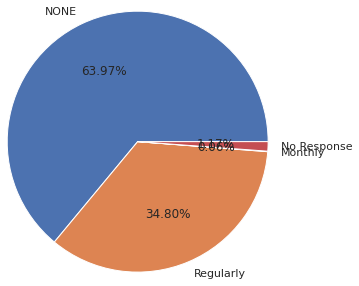

In [16]:
pie_chart(customers, 'fashion_news_frequency')

<a id="2"></a> <br>
> ##  **3.3 How old customers overall?**

In [17]:
customers = customers.dropna(axis = 0)

In [18]:
def distribution(df:pd.DataFrame, col:str):
    df[col] = df[col].astype(int)
    df[col].plot.hist()
    plt.show()

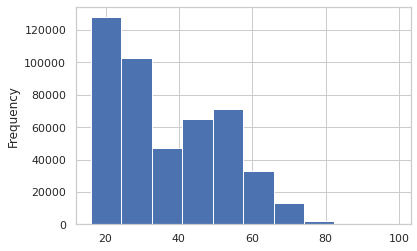

In [19]:
distribution(customers, 'age')

In [20]:
# relationship with age & club_member_status
# hypothesis : As you get older, you're not likely active in club member

# number of club_member_status by age

num_status_by_age = customers.groupby(['club_member_status'])['age'].value_counts().reset_index(name = 'number of status')
num_status_by_age.head()

,club_member_status,age,number of status
0,ACTIVE,21,25546
1,ACTIVE,20,21043
2,ACTIVE,22,19176
3,ACTIVE,23,18817
4,ACTIVE,24,17724


In [21]:
active = num_status_by_age[num_status_by_age['club_member_status'] == 'ACTIVE']
active

,club_member_status,age,number of status
0,ACTIVE,21,25546
1,ACTIVE,20,21043
2,ACTIVE,22,19176
3,ACTIVE,23,18817
4,ACTIVE,24,17724
...,...,...,...
76,ACTIVE,90,4
77,ACTIVE,91,2
78,ACTIVE,95,2
79,ACTIVE,94,1


In [22]:
import scipy.stats as stats

age = active['age'].tolist()
num_of_cust = active['number of status'].tolist()

corr, _ = stats.pearsonr (age, num_of_cust)
corr

-0.7928249676306093

In [23]:
active.corr()

,age,number of status
age,1.000000,-0.792825
number of status,-0.792825,1.000000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

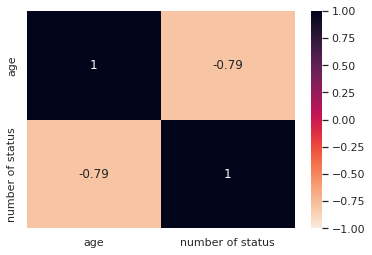

In [25]:
sns.heatmap(active.corr(), vmin = -1, vmax = 1, annot = True, cmap = "rocket_r")
plt.show()

In [26]:
# relationship with age & fashion_news_frequency

age_and_frequency = customers[['age', 'fashion_news_frequency']]
age_and_frequency.head()

,age,fashion_news_frequency
4,52,Regularly
7,32,Regularly
13,56,Regularly
14,29,Regularly
15,54,Regularly


In [27]:
age_and_frequency.dropna(axis = 0, subset = ['age'], inplace = True)

# nan -> no response
# 'NONE' -> 'None'


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [28]:
age_and_frequency.fillna('No Response', inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [29]:
# number
age_and_frequency['fashion_news_frequency'] = age_and_frequency['fashion_news_frequency'].replace('NONE', 'None')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
age_and_frequency = age_and_frequency.groupby(['age'])['fashion_news_frequency'].value_counts().reset_index(name = 'frequency_status')

In [31]:
# Hypothesis : As you get older, you're not likely to have regular frequency_status
age_and_frequency[age_and_frequency['fashion_news_frequency'] == 'Regularly'].corr()

,age,frequency_status
age,1.000000,-0.795244
frequency_status,-0.795244,1.000000


In [32]:
# EDA : Transaction
transactions = create_df(transactions)
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [33]:
# How's the distribution of price

def price_distribution(df:pd.DataFrame, col:str):
    df[col].plot.hist()
    plt.show()
    
# Which channel do they use the most?

def channel_frequency(df:pd.DataFrame, col:str):
    res = df[col].value_counts()
    return res

# Which products do they buy the most?(top N)

def loyal_cust(df:pd.DataFrame, col:str, top_n:int):
    top_n_cust = df[col].value_counts()[:top_n]
    return top_n_cust

# Take a look at price by sub group of product

articles_df = articles[['article_id','index_name', 'product_group_name']]

transactions_df = transactions[['article_id', 'price']]
ids = transactions_df['article_id']
transactions_df = get_article_id(transactions_df, ids)

merge_df = transactions_df.merge(articles_df, on='article_id')
merge_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,article_id,price,index_name,product_group_name
0,0663713001,0.050831,Lingeries/Tights,Underwear
1,0663713001,0.049475,Lingeries/Tights,Underwear
2,0663713001,0.050831,Lingeries/Tights,Underwear
3,0663713001,0.050831,Lingeries/Tights,Underwear
4,0663713001,0.050831,Lingeries/Tights,Underwear


In [34]:
loyal_cust(transactions, 'article_id', 10)

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
464297007    25025
372860002    24458
610776001    22451
399223001    22236
706016003    21241
Name: article_id, dtype: int64

In [35]:
# How's the mean price for each product by index_name?

def mean_price(df:pd.DataFrame, groupby_col:str):
    
    res = df.groupby(groupby_col)['price'].mean().reset_index()
    res = res.sort_values(by = 'price', ascending = False)

    sns.set_style('darkgrid')
    f,ax = plt.subplots(figsize = (10, 5))
    ax = sns.barplot(x = res.price, y = res.index_name, color = 'pink', alpha = 0.8)
    plt.show()

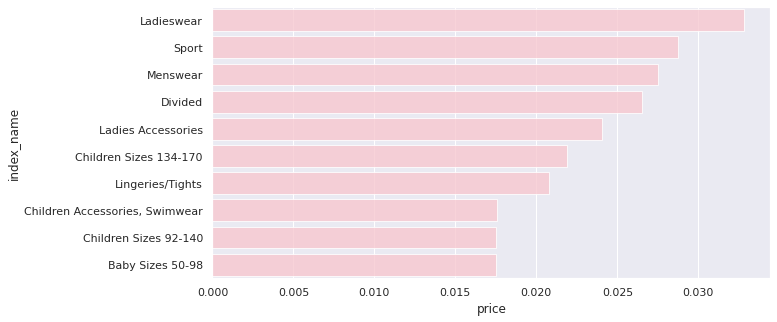

In [36]:
mean_price(merge_df, 'index_name')

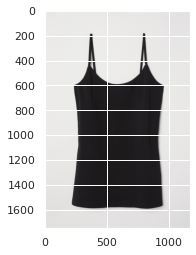

In [37]:
# EDA : image

import os, sys
import glob
from PIL import Image
import matplotlib.pyplot as plt

path = '../input/h-and-m-personalized-fashion-recommendations/images'

f_lst = []
for filename in os.listdir(path):
    res = os.path.join(path, filename)
    for file in os.listdir(res):
        f_lst.append(file)

for article_id in articles['article_id']:
    folder = article_id[:3]
    img = f'{article_id}.jpg'
    if img in f_lst:
        path = f'../input/h-and-m-personalized-fashion-recommendations/images/{folder}/{img}'
        res = Image.open(path)
        plt.imshow(res)
        break